<a href="https://colab.research.google.com/github/shreyashpu1/PW-Skills-Assignments/blob/main/08_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression & Its Evaluation

Question 1: What is Simple Linear Regression?
- Simple Linear Regression is a statistical method used to model the relationship between one independent variable (X) and one dependent variable (Y) by fitting a straight line.
- Y=βo​+β1​X
  - where
  - Y → dependent variable (target/output)
  - X → independent variable (predictor/input)
  - β₀ → intercept (value of Y when X = 0)
  - β₁ → slope (change in Y per unit change in X)

Question 2: What are the key assumptions of Simple Linear Regression?
1. Linearity
- The relationship between independent variable (X) and dependent variable (Y) must be linear.
- Meaning: change in Y is proportional to change in X.
2. Independence of Errors
- Observations must be independent of each other.
- Residuals should not be correlated (no autocorrelation).
- Common issue in time-series data.
3. Homoscedasticity (Constant Variance)
- The variance of residuals should remain constant across all values of X.
- If spread increases/decreases → heteroscedasticity.
- Causes unreliable standard errors and confidence intervals.
4. Normality of Residuals
- Errors should be normally distributed.
- Mainly important for hypothesis testing and confidence intervals.
- Not strictly required for prediction accuracy.
5. No Significant Outliers or Influential Points
- Extreme values can distort slope and intercept.
- Can mislead interpretation of relationships.

Question 3: What is heteroscedasticity, and why is it important to address in regression models?
- Heteroscedasticity occurs when the variance of residuals (errors) is not constant across all levels of the independent variable.
- In a good regression model → residuals should have uniform spread.
- In heteroscedasticity → residual spread widens or narrows as X changes.
- Example:
  - Low salary employees → small prediction errors
  - High salary employees → very large prediction errors
  - → This is heteroscedasticity.
- Why is it Important?
  1. Invalid Statistical Inference
  - Standard errors become incorrect.
  - Confidence intervals and p-values become unreliable.
  - You may falsely conclude a variable is significant.
  2. Biased Hypothesis Testing
  - Type I or Type II error risk increases.
  - Model decisions become statistically weak.
  3. Reduced Model Reliability
  - Predictions become inconsistent.
  - Model assumptions are violated.
  4. Efficiency Loss
  - Ordinary Least Squares (OLS) is no longer the Best Linear Unbiased Estimator (BLUE).

Question 4: What is Multiple Linear Regression?
- Multiple Linear Regression (MLR) is a statistical technique used to model the relationship between one dependent variable and two or more independent variables by fitting a linear equation.
- 𝑌 = b0 + 𝑏1𝑋1 + 𝑏2𝑋2 + ... + 𝑏𝑛𝑋𝑛
  - Where:
  - Y → dependent variable (target)
  - X₁, X₂, … Xₙ → independent variables (features)
  - b₀ → intercept
  - b₁, b₂, … → coefficients

- Simple Example
  - Predicting house price based on: area, number of bedrooms, age of property
- Instead of using one factor (simple regression), multiple regression uses several predictors simultaneously.

Question 5: What is polynomial regression, and how does it differ from linear
regression?
- Polynomial regression is a regression technique used to model non-linear relationships by adding higher-degree terms to the model while keeping it linear in coefficients.
- Simple Linear Regression:This model predicts a dependent variable using a single independent variable.
  -  $y = \beta_0 + \beta_1 x + \epsilon$
- Multiple Linear Regression: This expands the simple model to include multiple independent variables
  -  $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon$
- Polynomial Linear Regression: This is used when the relationship between the data points is curvilinear.
  -  $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_n x^n + \epsilon$
  - For two variables (x1 and x2) at a degree of 2, the formula looks like this:
  - $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_2^2 + \beta_5 x_1 x_2 + \epsilon$

Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:
- X = [1, 2, 3, 4, 5]
- Y = [2.1, 4.3, 6.1, 7.9, 10.2]
- Plot the regression line over the data points.
- (Include your Python code and output in the code box below.)

Intercept (b0): 0.17999999999999794
Slope (b1): 1.9800000000000004


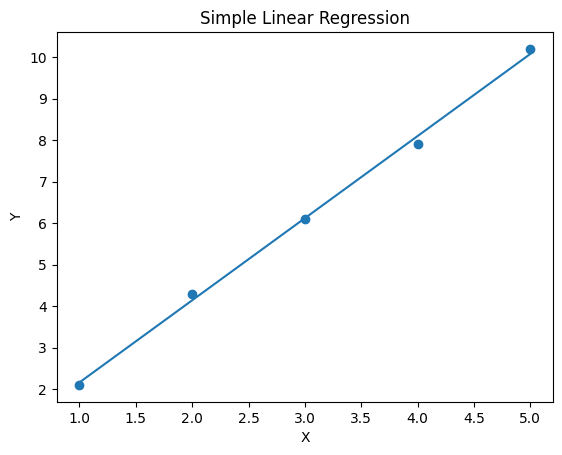

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and train model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Print coefficients
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

# Plot data points
plt.scatter(X, Y)

# Plot regression line
plt.plot(X, Y_pred)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.show()


Question 7: Fit a Multiple Linear Regression model on this sample data:
- Area = [1200, 1500, 1800, 2000]
- Rooms = [2, 3, 3, 4]
- Price = [250000, 300000, 320000, 370000]
- Check for multicollinearity using VIF and report the results.
(Include your Python code and output in the code box below.)

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create dataset
data = pd.DataFrame({
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
})

# Features and target
X = data[["Area", "Rooms"]]
y = data["Price"]

# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X.columns, model.coef_)))

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVIF Results:")
print(vif_data)


Intercept: 103157.89473684214
Coefficients: {'Area': np.float64(63.15789473684211), 'Rooms': np.float64(34736.842105263146)}

VIF Results:
  Feature         VIF
0    Area  127.796923
1   Rooms  127.796923


Question 8: Implement polynomial regression on the following data:
- X = [1, 2, 3, 4, 5]
- Y = [2.2, 4.8, 7.5, 11.2, 14.7]
- Fit a 2nd-degree polynomial and plot the resulting curve.
(Include your Python code and output in the code box below.)


Intercept: 0.06000000000000938
Coefficients: [0.   1.94 0.2 ]


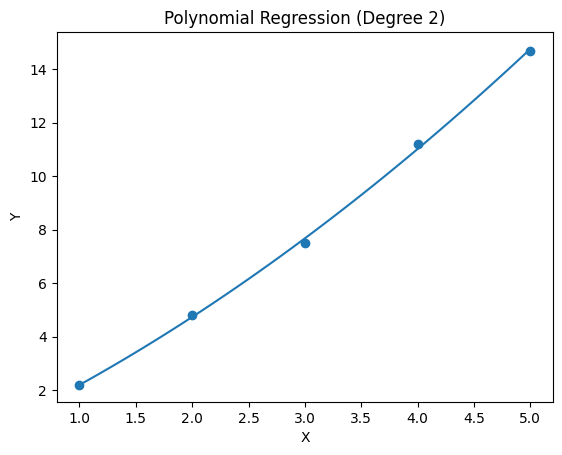

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_poly, Y)

# Predictions for smooth curve
X_range = np.linspace(1, 5, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
Y_pred = model.predict(X_range_poly)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Plot data points
plt.scatter(X, Y)

# Plot polynomial curve
plt.plot(X_range, Y_pred)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Degree 2)")
plt.show()

Question 9: Create a residuals plot for a regression model trained on this data:
- X = [10, 20, 30, 40, 50]
- Y = [15, 35, 40, 50, 65]
- Assess heteroscedasticity by examining the spread of residuals.
(Include your Python code and output in the code box below.)


Intercept: 6.499999999999993
Slope: 1.1500000000000001
Residuals: [-3.   5.5 -1.  -2.5  1. ]


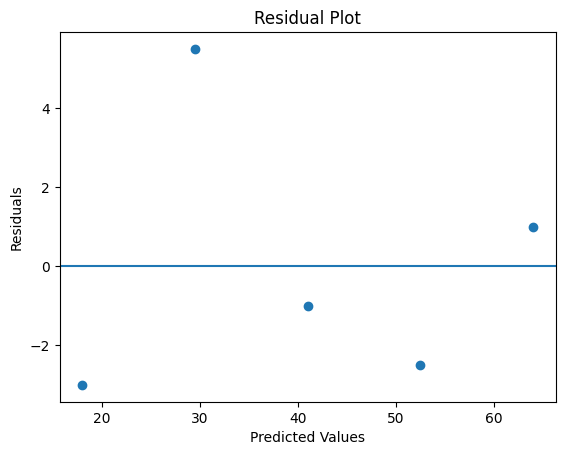

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Train regression model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Residuals
residuals = Y - Y_pred

# Print regression parameters
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("Residuals:", residuals)

# Residual plot
plt.scatter(Y_pred, residuals)

# Horizontal reference line
plt.axhline(y=0)

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

- Heteroscedasticity exists if:
  - residual variance increases/decreases with predicted values
  - funnel / cone-shaped pattern appears
- Observations:
  - Residuals are scattered around zero → basic regression assumption satisfied.
  - No clear increasing or decreasing spread → no visible heteroscedasticity pattern.
  - One relatively large positive residual (~5.5) → possible mild outlier influence.
  - Distribution looks random rather than structured → good sign.

Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.
1. Handling Multicollinearity
- Feature Engineering
  - Remove redundant predictors (e.g., area vs built-up area vs carpet area).
  - Combine correlated variables:
    - price_per_sqft
    - room_density
- Regularization Methods
  - Ridge Regression → reduces coefficient variance.
  - Lasso Regression → performs feature selection.
- Dimensionality Reduction
  - Principal Component Analysis (PCA)
  - Partial Least Squares (PLS)
  - Used when:
    - predictors are highly correlated
    - interpretability is less critical

2. Handling Heteroscedasticity
- Target Transformation
  - Apply: log(Price) or $\sqrt{Price}$
- Purpose:
  - stabilizes variance
  - improves linear relationshipHigh price ranges often create variance inflation.

- Robust Regression
  - Use:
    - Huber Regressor
    - Quantile Regression
    - RANSAC
- These reduce sensitivity to unequal variance.

- Weighted Least Squares (WLS)
  - Assign lower weights to observations with high variance.

- Robust Standard Errors
  - If prediction is fine but inference is affected: use heteroscedasticity-consistent errors (HC3)
